In [27]:

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:

import os
current_directory = os.getcwd()
while current_directory.endswith("Notebooks"):
    os.chdir("..")
    current_directory = os.getcwd()
    print("Current working directory: ", current_directory)

In [29]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
from pathlib import Path
from scipy.stats import skew, kurtosis
from utils.filepaths.filepaths import (
    FILE_PATH_CASE_102,
    FILE_PATH_CASE_102_HFM_T,
    FILE_PATH_CASE_102_HFM_T_OBS,
    FILE_PATH_CASE_102_HFM_Z,
    FILE_PATH_DRILLING_REPORT_LABELED_CASE_102,
)
from utils.constants.constants import conversion_factor_for_densities
from utils.utils.utils import (
    get_active_drilling_data,
    plot_flow_rpm_mud_dens_out,
    reading_labeled_drill_report_data,
    extracting_labeled_data_from_dataframe,
    plot_sections,
    plot_with_warnings_down_hole_ecd,
    plot_with_warnings_pack_off_sensor_1_2,
    regression_for_asm_data_points

)
from utils.Classes.Classes.PackOffDetectionAlgorithm import PackOffDetectionAlgorithm
sns.set_theme()

In [30]:
# Loading files
sensor_data_case_102 = pd.read_pickle(FILE_PATH_CASE_102)
# Extracting the dates to consider
tstamp_min = '2020-08-17 12:00:00+00:00'
tstamp_max = '2020-08-21 13:00:00+00:00'
sensor_data_case_102 = sensor_data_case_102.loc[tstamp_min:tstamp_max]
# First datapoint was removed during pickling of simdata. Have to so the same here
sensor_data_case_102 = sensor_data_case_102.iloc[1:] 
hfm_data_case_102_t = pd.read_pickle(FILE_PATH_CASE_102_HFM_T)
hfm_data_case_102_t_obs = pd.read_pickle(FILE_PATH_CASE_102_HFM_T_OBS)
hfm_data_case_102_z = pd.read_pickle(FILE_PATH_CASE_102_HFM_Z)
hfm_data_case_102_t.index = sensor_data_case_102.index
hfm_data_case_102_t_obs.index = sensor_data_case_102.index


In [31]:
# Threshold based on 100 us gpm value to ensure active drilling
threshold_value_flow = 0.0
df_sensor, df_simulated = get_active_drilling_data(df=sensor_data_case_102,sim_df = hfm_data_case_102_t_obs, include_rop_zeros=True)
# df_sensor = df_sensor[(df_sensor["MUD_FLOW_IN"]) > threshold_value_flow]
df_simulated = df_simulated.loc[df_sensor.index]

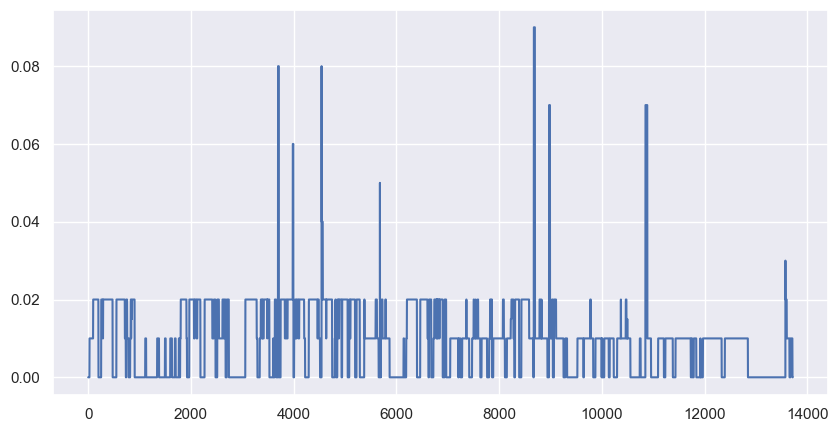

In [32]:
plt.figure(figsize=(10,5))
plt.plot(df_sensor["ropav"].values)
plt.show()

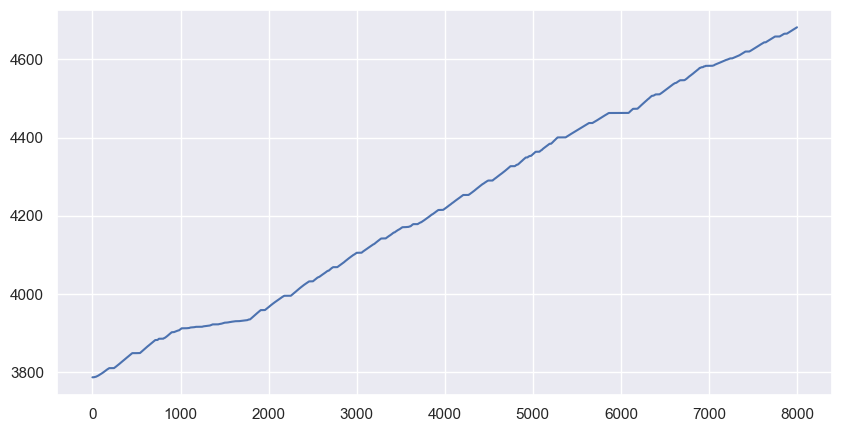

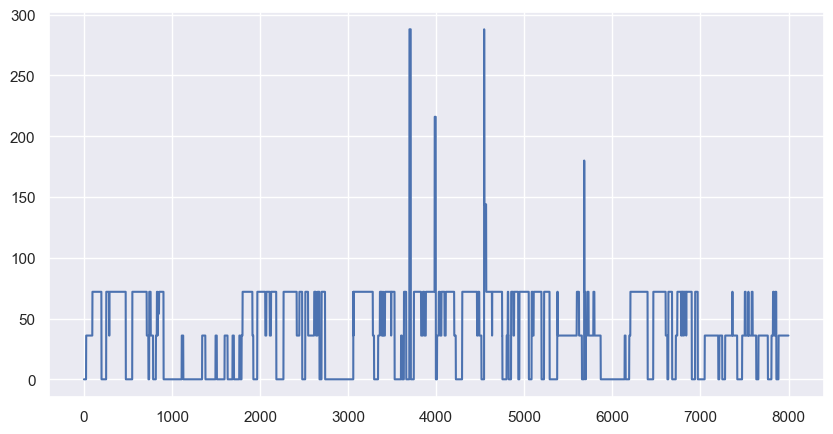

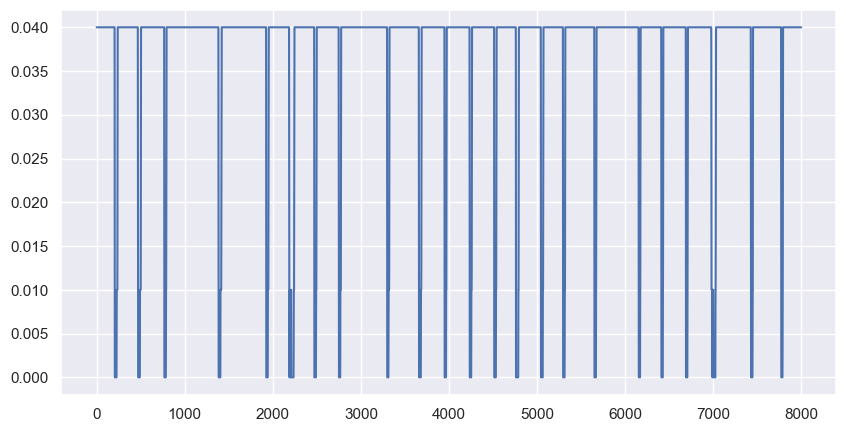

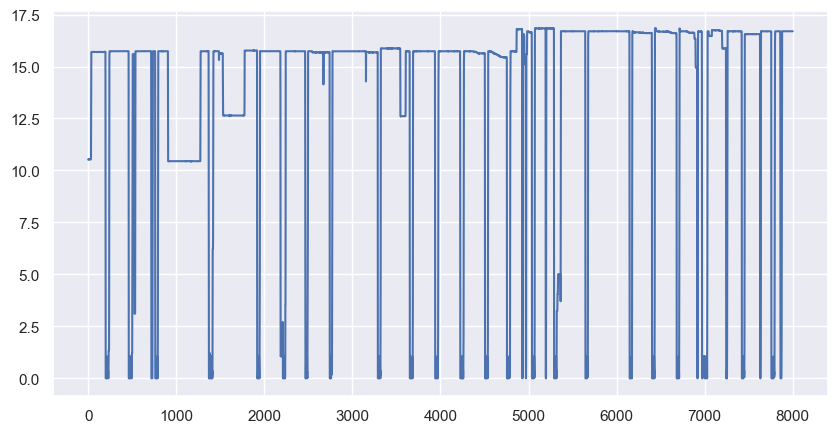

In [33]:
lower_bound = 0
upper_bound = 8000
hole_depth = df_sensor["DEPTH_HOLE"].iloc[lower_bound:upper_bound].values
asm_ecd_1 = df_sensor["ASMECD1-T"].iloc[lower_bound:upper_bound].values
flow = df_sensor["flowinav"].iloc[lower_bound:upper_bound].values
rpm = df_sensor["rpmav"].iloc[lower_bound:upper_bound].values
rop = df_sensor["ropav"].iloc[lower_bound:upper_bound].values * 3600

plt.figure(figsize=(10,5))
plt.plot(hole_depth)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(rop)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(flow)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(rpm)
plt.show()